### Webscrapping Part 1

In [1]:
from urllib.request import urlopen as ureq
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import time

# timeout issues
from selenium.webdriver.chrome.options import Options
chrome_options = Options()
chrome_options.page_load_strategy = 'normal'
chrome_options.add_argument('--enable-automation')
chrome_options.add_argument('disable-infobars')
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument('--ignore-certificate-errors')
chrome_options.add_argument('--allow-insecure-localhost')
chrome_options.add_argument('--allow-running-insecure-content')
chrome_options.add_argument('--disable-notifications')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument('--disable-browser-side-navigation')
chrome_options.add_argument('--headless')

driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - Current google-chrome version is 86.0.4240
[WDM] - Get LATEST driver version for 86.0.4240
[WDM] - Get LATEST driver version for 86.0.4240


[WDM] - Trying to download new driver from http://chromedriver.storage.googleapis.com/86.0.4240.22/chromedriver_win32.zip
[WDM] - Driver has been saved in cache [C:\Users\hwulanayu\.wdm\drivers\chromedriver\win32\86.0.4240.22]


In [2]:
PATH = r"C:\Program Files (x86)\chromedriver.exe"
driver = webdriver.Chrome(PATH)

brand_url ='https://reviews.femaledaily.com/brands'
#opening up connection, grabbing the page with selenium webdriver
driver.get(brand_url)

In [3]:
#Indonesian brands
brand_idn = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, "//*[@id='id_tab_Indonesia']")))
driver.execute_script("arguments[0].click();", brand_idn)

#brands alphabet
brand_list = brand_idn.find_element_by_xpath("//div[@class='jsx-2959408550 brand-alphabet-list']")
brand_char = brand_list.find_elements_by_tag_name('a')

In [4]:
list_brand_lokal = []
sum_prod_lokal =[]
list_link = []

# list of local beauty brands
for char in brand_char:
	driver.execute_script("arguments[0].click();", char)
	brand_list_prod = char.find_element_by_xpath("//div[@class='jsx-2959408550 brand-list-prod']")
	brand_prod = brand_list_prod.find_elements_by_tag_name('a')
	for name in brand_prod:
		brand_name = name.find_elements_by_tag_name('h2')
		sum_prod = name.find_elements_by_tag_name('p')
		list_link.append(name.get_attribute('href'))
		for only_name in brand_name:
			list_brand_lokal.append(only_name.text)
		for only_sum in sum_prod:
			sum_prod_lokal.append(only_sum.text)

In [5]:
len(list_brand_lokal)

790

In [6]:
zip_iterator = zip(list_brand_lokal, list_link)
brand_dict = dict(zip_iterator)
dict_skincare_lokal = {}
link_product = []

In [7]:
#get list of local skincare brand & products href
for key, value in brand_dict.items():
	driver.get(value)
	try:
		skincare_filter = driver.find_element_by_xpath("//*[contains(text(), 'SkinCare')]")
		driver.execute_script("arguments[0].click();", skincare_filter)
		element_exist = WebDriverWait(driver, 5).until(EC.presence_of_all_elements_located((By.XPATH, "//div[@class='jsx-4252524774 brand-product']")))
		if element_exist:
			dict_skincare_lokal[key] = value
			brand_product = WebDriverWait(driver, 5).until(EC.presence_of_all_elements_located((By.XPATH, "//a[@class='jsx-2059197805']")))
			for product in brand_product:
				link_product.append(product.get_attribute('href'))
	except:
		print("merk " + key + " tidak punya produk skincare")

merk Absolute tidak punya produk skincare
merk Abstract Beauty tidak punya produk skincare
merk Adev Natural tidak punya produk skincare
merk Adleeva tidak punya produk skincare
merk Aeris Beaute tidak punya produk skincare
merk Aeuko tidak punya produk skincare
merk Akiko Beauty tidak punya produk skincare
merk Aldo Akira tidak punya produk skincare
merk Alien Objects tidak punya produk skincare
merk Allglows tidak punya produk skincare
merk Amara tidak punya produk skincare
merk Andalan Feminine Care tidak punya produk skincare
merk Anggie Rassly Beauty tidak punya produk skincare
merk Annata Parfumah tidak punya produk skincare
merk ANOTHER YOU tidak punya produk skincare
merk ARRA Beauty tidak punya produk skincare
merk Artemy Beauty tidak punya produk skincare
merk Artisan Professionel tidak punya produk skincare
merk Aurelloly tidak punya produk skincare
merk Avicenna tidak punya produk skincare
merk Ayudya tidak punya produk skincare
merk B.O.S tidak punya produk skincare
merk B

merk Lifebuoy tidak punya produk skincare
merk Lindor Cosmetics tidak punya produk skincare
merk Lip On Lip tidak punya produk skincare
merk Lisselash tidak punya produk skincare
merk Lola Lashes tidak punya produk skincare
merk Longrich tidak punya produk skincare
merk Look At Me tidak punya produk skincare
merk Looke Cosmetics tidak punya produk skincare
merk Loreca Lashes tidak punya produk skincare
merk Lovama tidak punya produk skincare
merk Lumecolors tidak punya produk skincare
merk Lune Skin tidak punya produk skincare
merk Mad For Lipstick tidak punya produk skincare
merk Made Classic tidak punya produk skincare
merk Mahana tidak punya produk skincare
merk Makarizo tidak punya produk skincare
merk Makarizo Professional tidak punya produk skincare
merk Marjolaine tidak punya produk skincare
merk Marshwillow tidak punya produk skincare
merk Martinez Professionel tidak punya produk skincare
merk Masami Black tidak punya produk skincare
merk Mayon tidak punya produk skincare
merk 

In [8]:
print(len(dict_skincare_lokal))
print(len(link_product))

440
2903


In [9]:
subcategory = []
product_brand = []
product_name = []
product_variant = []
product_price =[]
product_desc = []
product_link = []

#get information for each product
for link in link_product:
	driver.get(link)
	driver.implicitly_wait(3) #wait 3 seconds

	try:
		breadcrumb_sub = driver.find_elements_by_xpath("//a[@class='jsx-3767633798 breadcrumb-section-text']")
		get_product_brand = driver.find_element_by_xpath("//h2[@class='jsx-1551634590 jsx-1264200707 product-brand']")
		get_product_name = driver.find_element_by_xpath("//h1[@class='jsx-1551634590 jsx-1264200707 product-name']")
        
		get_desc_toggle = driver.find_element_by_xpath('//span[@class="jsx-1551634590 jsx-1264200707 toggle-desc expanded"]')
		driver.execute_script("arguments[0].click();", get_desc_toggle)
		get_product_desc = driver.find_element_by_xpath("//p[@class='jsx-1551634590 jsx-1264200707 product-desc']")
   
		#get product price
		get_product_price = WebDriverWait(driver, 3).until(EC.presence_of_all_elements_located((By.XPATH, "//p[@class='jsx-1551634590 jsx-1264200707 product-price']")))
		if get_product_price:
			product_price.append(get_product_price[0].text)
		else:
			product_price.append('Rp 0')
         
		#get product variant
		get_product_variant = WebDriverWait(driver, 3).until(EC.presence_of_all_elements_located((By.XPATH, '//h3[@class="jsx-1551634590 jsx-1264200707 product-shade"]')))
		if get_product_variant:
			product_variant.append(get_product_variant[0].text)
		else:
			product_variant.append('-')
	        
		#append the information to lists
		subcategory.append(breadcrumb_sub[1].text)
		product_brand.append(get_product_brand.text)
		product_name.append(get_product_name.text)
		product_desc.append(get_product_desc.text)
		product_link.append(link)
	except:
		print('something not found')

something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found
something not found


In [10]:
print(len(subcategory))
print(len(product_brand))
print(len(product_name))
print(len(product_price))
print(len(product_desc))
print(len(product_variant))

2858
2858
2858
2858
2858
2858


In [11]:
import pandas as pd

In [12]:
df = pd.DataFrame(list(zip(subcategory, product_brand, product_name, product_variant, product_price, product_desc, product_link)), 
                  columns= ['subcategory', 'brand', 'name', 'variant', 'price', 'description', 'link'])

In [13]:
df

,subcategory,brand,name,variant,price,description,link
0,Sun Protection,Acanthe,Sunscreen Cream SPF 40,,Rp. 150.000,Acanthe Sunscreen Cream SPF 40 merupakan sunsc...,https://reviews.femaledaily.com/products/moist...
1,Serum & Essence,Acanthe,Triple C Serum,,Rp. 1.250.000,Achante Triple C adalah produk dermatologi yan...,https://reviews.femaledaily.com/products/treat...
2,Acne Treatment,Acne Feldin,Lotion,,Rp. 40.000,Acne Feldin Lotion merupakan lotion khusus unt...,https://reviews.femaledaily.com/products/treat...
3,Toner,Acne Feldin,Ressal Acne Lotion,"Ethanol, aqua, cucumis sativus extract, hamame...",Rp. 38.000,"Membersihkan kulit dari debu dan kotoran, memp...",https://reviews.femaledaily.com/products/clean...
4,Acne Treatment,Acnol,Lotion for Acne,,Rp. 15.000,Acnol Lotion for Acne merupakan perawatan untu...,https://reviews.femaledaily.com/products/treat...
...,...,...,...,...,...,...,...
2853,Face,Zoya Cosmetics,Natural White Cleansing Milk,,Rp. 20.000,Susu pembersih yang berfungsi untuk mengangkat...,https://reviews.femaledaily.com/products/makeu...
2854,Night Cream,Zoya Cosmetics,Dream Bright Night Cream,,Rp. 75.000,There's no description for this product.,https://reviews.femaledaily.com/products/moist...
2855,Scrub & Exfoliator,Zoya Cosmetics,Lip Scrub Sugar ZOYA Cosmetics,Sugar,Rp. 0,There's no description for this product.,https://reviews.femaledaily.com/products/clean...
2856,Face,Zoya Cosmetics,Cleansing Water,,Rp. 33.000,There's no description for this product.,https://reviews.femaledaily.com/products/makeu...


In [14]:
df.to_csv("Indonesian Skincare Products_Nov.csv", index=False, header=True)

### Preprosessing

In [203]:
import pandas as pd
local_products = pd.read_csv("Indonesian Skincare Products_Nov.csv")
local_products

,subcategory,brand,name,variant,price,description,link
0,Sun Protection,Acanthe,Sunscreen Cream SPF 40,NaN,Rp. 150.000,Acanthe Sunscreen Cream SPF 40 merupakan sunsc...,https://reviews.femaledaily.com/products/moist...
1,Serum & Essence,Acanthe,Triple C Serum,NaN,Rp. 1.250.000,Achante Triple C adalah produk dermatologi yan...,https://reviews.femaledaily.com/products/treat...
2,Acne Treatment,Acne Feldin,Lotion,NaN,Rp. 40.000,Acne Feldin Lotion merupakan lotion khusus unt...,https://reviews.femaledaily.com/products/treat...
3,Toner,Acne Feldin,Ressal Acne Lotion,"Ethanol, aqua, cucumis sativus extract, hamame...",Rp. 38.000,"Membersihkan kulit dari debu dan kotoran, memp...",https://reviews.femaledaily.com/products/clean...
4,Acne Treatment,Acnol,Lotion for Acne,NaN,Rp. 15.000,Acnol Lotion for Acne merupakan perawatan untu...,https://reviews.femaledaily.com/products/treat...
...,...,...,...,...,...,...,...
2853,Face,Zoya Cosmetics,Natural White Cleansing Milk,NaN,Rp. 20.000,Susu pembersih yang berfungsi untuk mengangkat...,https://reviews.femaledaily.com/products/makeu...
2854,Night Cream,Zoya Cosmetics,Dream Bright Night Cream,NaN,Rp. 75.000,There's no description for this product.,https://reviews.femaledaily.com/products/moist...
2855,Scrub & Exfoliator,Zoya Cosmetics,Lip Scrub Sugar ZOYA Cosmetics,Sugar,Rp. 0,There's no description for this product.,https://reviews.femaledaily.com/products/clean...
2856,Face,Zoya Cosmetics,Cleansing Water,NaN,Rp. 33.000,There's no description for this product.,https://reviews.femaledaily.com/products/makeu...


#### Brands

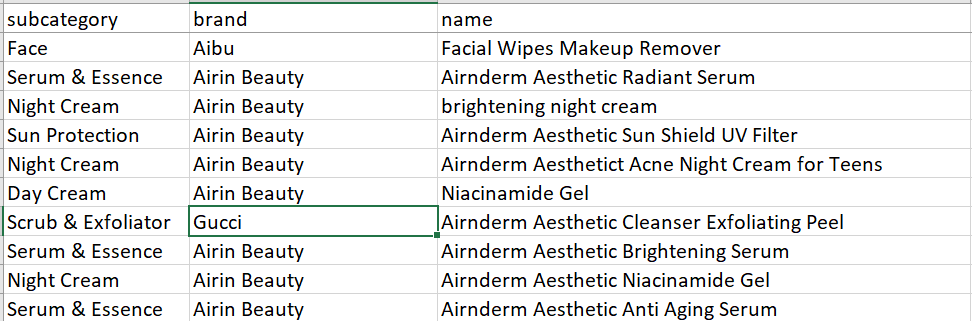

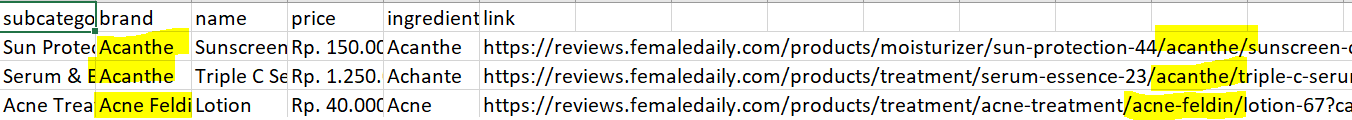

In [204]:
#get brand names from link
links = local_products['link']
separated_link =[]
for link in links:
    splitted = link.split('/')
    separated_link.append(splitted[6])

In [205]:
separated_link = [x.replace('-', ' ') for x in separated_link]

In [206]:
import string

def clean_text(text):    
    #lower the case
    text = text.lower()

    #remove punctuation
    text = text.translate(str.maketrans('','', string.punctuation))
    
    return text

In [207]:
local_products['brand'] = local_products['brand'].apply(lambda p:clean_text(p))

In [208]:
#matching brands with its link
for i, link in zip(local_products.iterrows(), separated_link):
    brand = i[1]['brand'].lower()
    if not (brand.startswith(link[0]) and brand.endswith(link[-1])):
        local_products.at[i[0], 'brand'] = link

#### Duplicate rows

In [209]:
local_products.duplicated(keep=False).sum()

4

In [210]:
local_products[local_products.duplicated(keep=False)]

,subcategory,brand,name,variant,price,description,link
1276,Toner,kitoderm,Toner,Normal,Rp. 17.000,Active Ingredients:\n\nLactic Acid,https://reviews.femaledaily.com/products/clean...
1277,Toner,kitoderm,Toner,Normal,Rp. 17.000,Active Ingredients:\n\nLactic Acid,https://reviews.femaledaily.com/products/clean...
2073,Wash-Off,pulchra,Fask Jelly Peel Off Mask,Mint O Jelly,Rp. 0,There's no description for this product.,https://reviews.femaledaily.com/products/mask/...
2074,Wash-Off,pulchra,Fask Jelly Peel Off Mask,Mint O Jelly,Rp. 0,There's no description for this product.,https://reviews.femaledaily.com/products/mask/...


In [211]:
#drop last duplicate product 
local_products = local_products.drop_duplicates().reset_index(drop=True)

#### Preloved products

In [212]:
preloved = local_products[local_products['description'].str.lower().str.contains(r'preloved|aku jual| mau jual')]
preloved

,subcategory,brand,name,variant,price,description,link
30,Day Cream,airin beauty,Niacinamide Gel,NaN,Rp. 0,"Aku Mau Jual Produk Airin Masih Baru Tersegel,...",https://reviews.femaledaily.com/products/moist...
396,Acne Treatment,callista skin treatment,acne 2,NaN,Rp. 50,aku mau jual night cream acne 2 dari callista\...,https://reviews.femaledaily.com/products/treat...
493,Face,dear me beauty,Dear Me Beauty 30 Secon Meltaway Cleansing Balm,Honey,Rp. 0,"Preloved baru pakek 2kali kondisi 95%, bagus b...",https://reviews.femaledaily.com/products/makeu...
494,Face,dear me beauty,Dear Me Beauty 30 Second Meltaway Cleansing Balm,honey,Rp. 0,Preloved baru 2 kali pemakaian 95% bagus buat ...,https://reviews.femaledaily.com/products/makeu...


In [213]:
#drop preloved products
local_products = local_products.drop(preloved.index, axis = 0).reset_index(drop=True)

#### Bodycare products

In [214]:
contain_body = local_products[local_products['name'].str.lower().str.contains(r'body')]
not_contain_face = contain_body[~contain_body['name'].str.lower().str.contains(r'face|wajah')]
not_contain_face

,subcategory,brand,name,variant,price,description,link
235,Scrub & Exfoliator,beautetox,Body Scrub,White Milky,Rp. 0,Whitemilky Face and Body Scrub dengan kandunga...,https://reviews.femaledaily.com/products/clean...
503,Peeling,debiuryn,Body Enzyme Peel,NaN,Rp. 238.000,DeBiuryn Body Enzyme Peel merupakan peeling lo...,https://reviews.femaledaily.com/products/treat...
878,Lotion & Emulsion,guardian,Les Tentations Mediterranèennes Body Lotion,Grape Seed Oil,Rp. 30.000,"Grape Seed Oil, Barley Malt, Sweet Violet",https://reviews.femaledaily.com/products/moist...
915,Scrub & Exfoliator,hanasui,Body Spa,Aloe Vera,Rp. 21.500,Gel pembesih berfungsi mengangkat sel-sel kuli...,https://reviews.femaledaily.com/products/clean...
921,Serum & Essence,hanasui,hanasui body serum gel sakura,white flawless sakura,Rp. 24.000,There's no description for this product.,https://reviews.femaledaily.com/products/treat...
1003,Butter,herborist,Body Butter,Blueberry,Rp. 214.000,Sephora Body Butter adalah pelembab dengan for...,https://reviews.femaledaily.com/products/moist...
1011,Lotion & Emulsion,herborist,herborist body butter matcha milk,NaN,Rp. 20.000,There's no description for this product.,https://reviews.femaledaily.com/products/moist...
1382,Lotion & Emulsion,laurent,Laurent Silkening Body Lotion,with Goat’s Milk,Rp. 34.300,Lotion mewah bertekstur ringan dan tidak lengk...,https://reviews.femaledaily.com/products/moist...
1433,Lotion & Emulsion,lovana,Lovana Body Butter,Lovana Body Butter,Rp. 30.000,Lovana Body Butter merupakan moisture therapy ...,https://reviews.femaledaily.com/products/moist...
1474,Lotion & Emulsion,macora skin care,Brightening Body Serum,NaN,Rp. 150.000,There's no description for this product.,https://reviews.femaledaily.com/products/moist...


In [215]:
#drop bodycare products
local_products = local_products.drop(not_contain_face.index, axis = 0).reset_index(drop=True)

#### Variant and Description

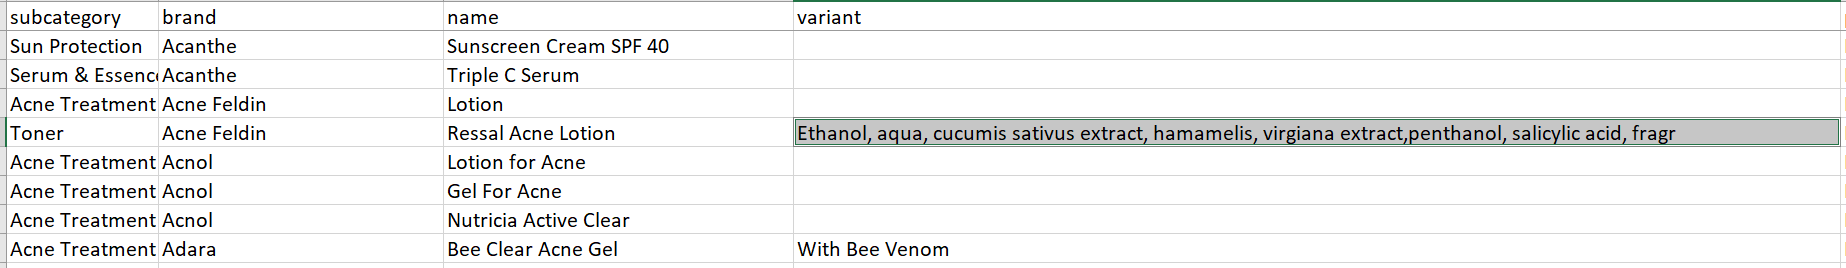

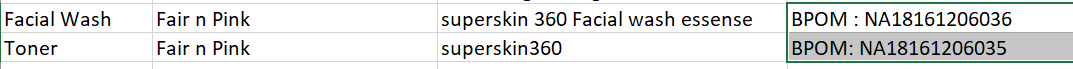

In [216]:
local_products.count()

subcategory    2837
brand          2837
name           2837
variant         817
price          2837
description    2837
link           2837
dtype: int64

In [217]:
local_products.isnull().sum()

subcategory       0
brand             0
name              0
variant        2020
price             0
description       0
link              0
dtype: int64

In [218]:
local_products['variant'].fillna('-', inplace = True)

In [219]:
local_products.isnull().sum()

subcategory    0
brand          0
name           0
variant        0
price          0
description    0
link           0
dtype: int64

In [220]:
for i, row in local_products.iterrows():
    if "ingredients:\n" or 'ingredients :\n' in row.description.lower():
        if "ingredients:\n-" not in row.description.lower():
            words = row.description.split('\n')
            local_products.at[i,'description'] = words[-1]

In [221]:
def countNumber(string):
    return sum(char.isdigit() for char in string)

desc_words = ['ingredient', 'contain', 'made with', 'formula', 'komposisi', 'kombinasi', 'mengandung', 'kandungan', 'bahan', '100%', '100 %']

for i, row in local_products.iterrows():
    #description
    comma = row.description.count(',')
    if (not any(s in row.description.lower() for s in desc_words)) and (comma < 4):
        local_products.at[i,'description'] = '-'
    #variant
    var_words = len(row.variant.split(' ')) 
    if (var_words >= 6) or (countNumber(row.variant) >= 3):
        local_products.at[i, 'variant'] = '-'

In [222]:
unrelated = local_products[local_products['variant'].str.lower().str.contains('ml')]
unrelated

,subcategory,brand,name,variant,price,description,link
948,Face Oil,happy green,Organic Jojoba Oil,10ml,Rp. 35.000,-,https://reviews.femaledaily.com/products/moist...
1077,Face Oil,indoganic,Chia Seed Oil,30 ml,Rp. 189.000,-,https://reviews.femaledaily.com/products/moist...
1898,Acne Treatment,organic supply co,Tea Tree Essential Oil,5ml,Rp. 125,"Cinnamon, Clary Sage, Clove, Geranium, Lavende...",https://reviews.femaledaily.com/products/treat...
2031,Face Oil,primaderma,Alfacid Smoothing 15 Serum,15 ml,Rp. 35,Membantu merawat kelembapan dan kehalusan kuli...,https://reviews.femaledaily.com/products/moist...
2047,Serum & Essence,primaderma,Hyamoist Pro-C,15 ml,Rp. 55.000,-,https://reviews.femaledaily.com/products/treat...


In [223]:
for var in unrelated:
    local_products.at[unrelated.index, 'variant'] = '-'

In [224]:
contain_gr = local_products[local_products['variant'].str.lower().str.contains('gr')]
unrelated_gr = contain_gr[~contain_gr['variant'].str.lower().str.contains(r'green|pomegran|grape')]
unrelated_gr

,subcategory,brand,name,variant,price,description,link
1514,Day Cream,marcks,Marcks Moisturizer,30gr,Rp. 20.000,"Water, Glycerin Titanium dioxide,Glayceryl ste...",https://reviews.femaledaily.com/products/moist...
2034,Day Cream,primaderma,Whitening UV Protection Cream Of 30 P1,10 gr,Rp. 30.672,-,https://reviews.femaledaily.com/products/moist...
2036,Day Cream,primaderma,Vit B Gel,10 gr,Rp. 17.412,* mengandung vitamin b3,https://reviews.femaledaily.com/products/moist...


In [225]:
for var in unrelated_gr:
    local_products.at[unrelated_gr.index, 'variant'] = '-'

####  

In [226]:
local_products = local_products.rename({'description': 'ingredients'}, axis='columns')

In [227]:
#add main or all ingredients
isAll = [0] * len(local_products)

In [228]:
local_products.insert(6, "isAll", isAll)

In [229]:
local_products.to_csv("Indonesian Skincare Products_Nov - clean ver2.csv", index=False, header=True)